In [1]:
!pwd

/Users/martapiscitelli/Desktop/Marta/uni/MASTER/Lab/chaoss


In [2]:
ls

2bodyEulerCromer_1000_steps_per_Orbit.txt
2bodyEulerCromer_100_steps_per_Orbit.txt
2bodyEulerCromer_500_steps_per_Orbit.txt
2bodyEulerCromer_50_steps_per_Orbit.txt
2bodyEulerCromer_adaptive_eta=6.3e-03.txt
2bodyEuler_1000_steps_per_Orbit.txt
2bodyEuler_100_steps_per_Orbit.txt
2bodyEuler_500_steps_per_Orbit.txt
2bodyEuler_50_steps_per_Orbit.txt
2bodyEuler_adaptive_eta=6.3e-03.txt
2bodyLeapFrog_1000_steps_per_Orbit.txt
2bodyLeapFrog_100_steps_per_Orbit.txt
2bodyLeapFrog_500_steps_per_Orbit.txt
2bodyLeapFrog_50_steps_per_Orbit.txt
2bodyLeapFrog_adaptive_eta=6.3e-03.txt
2bodyRK4_1000_steps_per_Orbit.txt
2bodyRK4_100_steps_per_Orbit.txt
2bodyRK4_500_steps_per_Orbit.txt
2bodyRK4_50_steps_per_Orbit.txt
2bodyRK4_adaptive_eta=6.3e-03.txt
3bodyRK4_delta=2.00e-02_adaptive_eta=6.3e-03.txt
3bodyRK4_delta=2.0e-02_adaptive_eta=6.3e-03.txt
3bodyRK4_delta=2.10e-02_adaptive_eta=6.3e-03.txt
3bodyRK4_delta=2.1e-02_adaptive_eta=1.0e-03.txt
3bodyRK4_delta=2.20e-02_adaptive_eta=6.3e-03.txt
3bodyRK4_delta=2.3

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import math 
from scipy.optimize import curve_fit
from scipy.special import wofz

import matplotlib.pyplot as plt
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams.update(plt.rcParamsDefault)
cmap = plt.get_cmap('Set3')
cmap2 = plt.get_cmap('Set1')
cmap3 = plt.get_cmap('Dark2')
cmap4 = plt.get_cmap('tab20b')
cmap5 = plt.get_cmap('Set2')
cmap6 = plt.get_cmap('tab10')
cmap7 = plt.get_cmap('tab20')

In [4]:
# parameters for figure size
w = 7
h = 6
save = True 

# Adaptive time step evolution

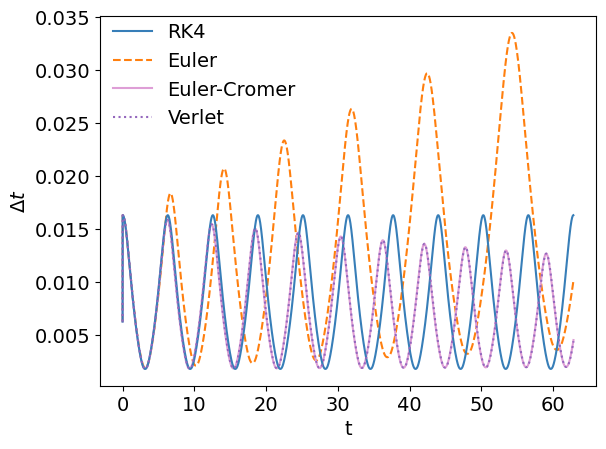

In [5]:
## plot 

#importing data
RK4=pd.read_csv("2bodyRK4_adaptive_eta=6.3e-03.txt",
names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
encoding='latin-1',
sep=" "
)

#EULER
Euler=pd.read_csv("2bodyEuler_adaptive_eta=6.3e-03.txt",
names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
encoding='latin-1',
sep=" "
)

#EULER Cromer
EC=pd.read_csv("2bodyEulerCromer_adaptive_eta=6.3e-03.txt",
names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
encoding='latin-1',
sep=" "
)

#Leapfrog
LF=pd.read_csv("2bodyLeapFrog_adaptive_eta=6.3e-03.txt",
names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
encoding='latin-1',
sep=" "
)
    
plt.plot(RK4.t, RK4.h,ms = 1,  label='RK4', color = cmap2(1))

#Euler
plt.plot(Euler.t, Euler.h ,ms = 0.1, label='Euler',linestyle = 'dashed', color = cmap6(1),zorder =0)

#Euler Cromer
plt.plot(EC.t, EC.h,ms = 1, label='Euler-Cromer', color = cmap4(19), zorder = 1)

#Leap.frog
plt.plot(LF.t, LF.h ,ms = 1, label='Verlet', linestyle = 'dotted', color = cmap6(4),zorder =2)


# plot design
plt.xlabel('t',fontsize = 14)
plt.ylabel('$\Delta t$', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fancybox= True, framealpha=0.0, fontsize= 14, bbox_to_anchor=(0.43, 0.65))

plt.savefig("adaptivetimestep" + ".pdf", bbox_inches = 'tight')
#plt.savefig("nonadaptive_orbits" + str(i) + ".pdf")





 # All plots together
 ## - trajectories
 ## - eccentricity
 ## - angular momentum
 ## - semi-major axis
 ## - energy

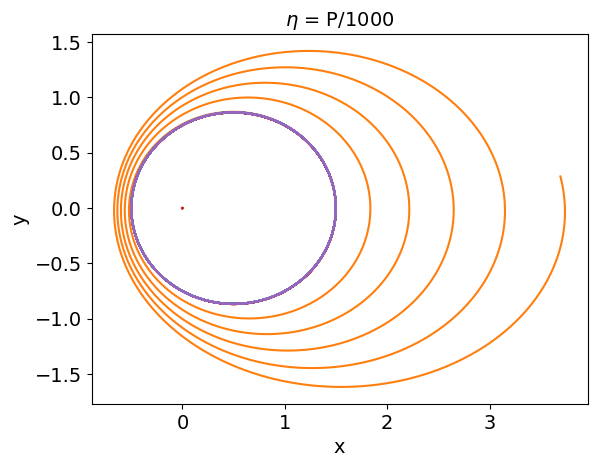

In [6]:

steps = [50,100,500,1000]

for i in steps:
    plt.close()
#importing data 
    RK4=pd.read_csv("2bodyRK4_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER
    Euler=pd.read_csv("2bodyEuler_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER Cromer
    EC=pd.read_csv("2bodyEulerCromer_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#Leapfrog
    LF=pd.read_csv("2bodyLeapfrog_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

## Plotting the orbits of the planets using different integrators. 

    #RK4
    plt.plot(RK4.x1, RK4.y1)
    plt.plot(RK4.x2, RK4.y2,  label='RK4', ms = 1,linestyle = 'dashed', color = cmap2(1), zorder = 2)
    
    #Euler
    plt.plot(Euler.x1, Euler.y1)
    plt.plot(Euler.x2, Euler.y2, ms = 0.1, label='Euler',linestyle = 'solid', color = cmap6(1),zorder =0)
    
    #Euler Cromer
    plt.plot(EC.x1, EC.y1)
    plt.plot(EC.x2, EC.y2, label='Euler-Cromer', color = cmap6(3), zorder = 1)
    
    #Leap.frog
    plt.plot(LF.x1, LF.y1)
    plt.plot(LF.x2, LF.y2,  label='Verlet', linestyle = 'dotted', color = cmap6(4),zorder =2)
    
    
    # plot design
    plt.xlabel('x',fontsize = 14)
    plt.ylabel('y', fontsize = 14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('$\eta$ = P/'+ str(i), fontsize = 14)
    
    if i == 50:
        plt.legend(fancybox= True, framealpha=0.5, fontsize= 12, loc='upper right')
    
    #print(RK4.t)

    plt.savefig("nonadaptive_orbits" + str(i) + ".pdf", bbox_inches = 'tight')
    #plt.savefig("nonadaptive_orbits" + str(i) + ".pdf")



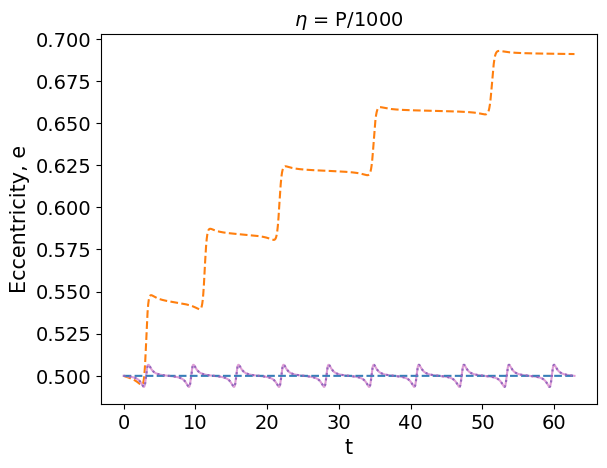

In [7]:
## eccentricity 

steps = [50,100,500,1000]

for i in steps:
    plt.close()
    
    #importing data 
    RK4=pd.read_csv("2bodyRK4_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER
    Euler=pd.read_csv("2bodyEuler_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER Cromer
    EC=pd.read_csv("2bodyEulerCromer_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#Leapfrog
    LF=pd.read_csv("2bodyLeapfrog_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)
    plt.plot()
    plt.plot(RK4.t, RK4.e,  label='RK4', ms = 1,linestyle = 'dashed', color = cmap2(1), zorder = 2)
    
    #Euler      color = cmap6(3)   cmap6(1)
    plt.plot(Euler.t, Euler.e, ms = 0.1, label='Euler',linestyle = 'dashed', color = cmap6(1),zorder =0)
    
    #Euler Cromer
    plt.plot(EC.t, EC.e, ms = 1, label='Euler-Cromer', color = cmap4(19), zorder = 1)
    
    #Leap.frog
    plt.plot(LF.t, LF.e,ms = 1, label='Verlet', linestyle = 'dotted', color = cmap6(4),zorder =2)
    
    #roof = Euler.e.max() + 0.035
    #plt.ylim(top = roof)

    s = str(i)
    # plot design
    plt.xlabel('t',fontsize = 15)
    plt.ylabel('Eccentricity, e', fontsize = 15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('$\eta$ = P/'+ str(i), fontsize = 14)
    
    if i == 50:
        plt.legend(fancybox= True, framealpha=0.5, fontsize= 12, bbox_to_anchor=(0.65, 0.55))
    

    plt.savefig("twobodyecc" + str(i) + ".pdf", bbox_inches = 'tight')
    #plt.savefig("nonadaptive_orbits" + str(i) + ".pdf")





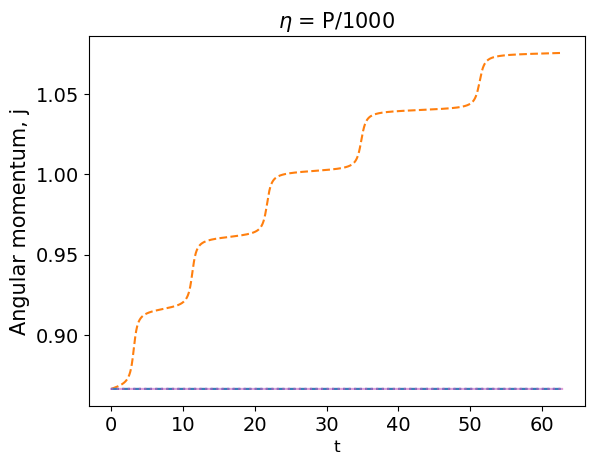

In [8]:
## angular momentum

steps = [50,100,500,1000]

for i in steps:
    plt.close()
    
    #importing data 
    RK4=pd.read_csv("2bodyRK4_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER
    Euler=pd.read_csv("2bodyEuler_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER Cromer
    EC=pd.read_csv("2bodyEulerCromer_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#Leapfrog
    LF=pd.read_csv("2bodyLeapfrog_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)
  
    plt.plot(RK4.t, RK4.j,  label='RK4',  ms = 1,linestyle = 'dashed', color = cmap2(1), zorder = 2)
    
    #Euler
    plt.plot(Euler.t, Euler.j,  ms = 0.1, label='Euler',linestyle = 'dashed', color = cmap6(1),zorder =0)
    
    #Euler Cromer
    plt.plot(EC.t, EC.j, ms = 1, label='Euler-Cromer', color = cmap4(19), zorder = 1)
    
    #Leap.frog
    plt.plot(LF.t, LF.j,ms = 1, label='Verlet', linestyle = 'dotted', color = cmap6(4),zorder =2)


    
    
    # plot design
    plt.xlabel('t',fontsize = 12)
    plt.ylabel('Angular momentum, j', fontsize = 15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('$\eta$ = P/'+ str(i), fontsize = 15)
    
    if i== 50:
        plt.legend(fancybox= True, framealpha=0.5, fontsize= 12,  bbox_to_anchor=(1.0, 0.9))
    

    plt.savefig("twobody_j" + str(i) + ".pdf", bbox_inches = 'tight')
    #plt.savefig("nonadaptive_orbits" + str(i) + ".pdf")






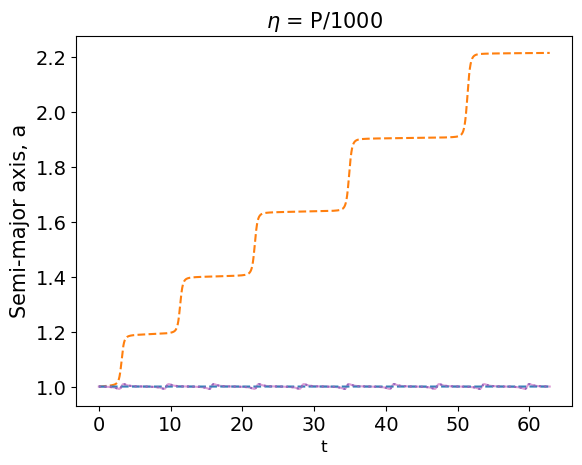

In [9]:
## semimaj axis

steps = [50,100,500,1000]

for i in steps:
    plt.close()
    
    #importing data 
    RK4=pd.read_csv("2bodyRK4_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER
    Euler=pd.read_csv("2bodyEuler_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER Cromer
    EC=pd.read_csv("2bodyEulerCromer_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#Leapfrog
    LF=pd.read_csv("2bodyLeapfrog_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)
  
    plt.plot(RK4.t, RK4.a,  label='RK4', ms = 1,linestyle = 'dashed', color = cmap2(1), zorder = 2)
    
    #Euler
    plt.plot(Euler.t, Euler.a, label='Euler',linestyle = 'dashed', color = cmap6(1),zorder =0)
    
    #Euler Cromer
    plt.plot(EC.t, EC.a,label='Euler-Cromer', color = cmap4(19), zorder = 1)
    
    #Leap.frog
    plt.plot(LF.t, LF.a, label='Verlet', linestyle = 'dotted', color = cmap6(4),zorder =2)
    
    # plot design
    plt.xlabel('t',fontsize = 12)
    plt.ylabel('Semi-major axis, a', fontsize = 15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('$\eta$ = P/'+ str(i), fontsize = 15)
    
    if i==50:
        plt.legend(fancybox= True, framealpha=0.5, fontsize= 12, bbox_to_anchor=(1.0, 0.55))
    

    plt.savefig("twobody_a" + str(i) + ".pdf", bbox_inches = 'tight')
    #plt.savefig("nonadaptive_orbits" + str(i) + ".pdf")


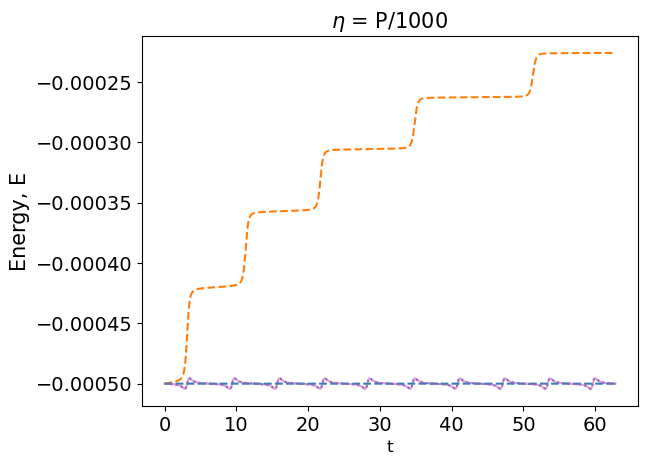

In [10]:
## Energy

steps = [50,100,500,1000]

for i in steps:
    plt.close()
  
    #importing data 
    RK4=pd.read_csv("2bodyRK4_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER
    Euler=pd.read_csv("2bodyEuler_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER Cromer
    EC=pd.read_csv("2bodyEulerCromer_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#Leapfrog
    LF=pd.read_csv("2bodyLeapfrog_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)
    plt.plot(RK4.t, RK4.E,  label='RK4', ms = 1,linestyle = 'dashed', color = cmap2(1), zorder = 2)
    
    #Euler
    plt.plot(Euler.t, Euler.E, label='Euler',linestyle = 'dashed', color = cmap6(1),zorder =0)
    
    #Euler Cromer
    plt.plot(EC.t, EC.E, label='Euler-Cromer', color = cmap4(19), zorder = 1)
    
    #Leap.frog
    plt.plot(LF.t, LF.E,label='Verlet', linestyle = 'dotted', color = cmap6(4),zorder =2)
    
    
    # plot design
    plt.xlabel('t',fontsize = 12)
    plt.ylabel('Energy, E', fontsize = 15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('$\eta$ = P/'+ str(i), fontsize = 15)
    
    if i == 50:
        plt.legend(fancybox= True, framealpha=0.5, fontsize= 12, bbox_to_anchor=(1.0, 0.9))
    

    plt.savefig("twobody_E" + str(i) + ".pdf", bbox_inches = 'tight')
    #plt.savefig("nonadaptive_orbits" + str(i) + ".pdf")



 # Errors 
 ## - log E...
 ## - log e...
 ## - log a...

In [11]:
#plt.plot(LF.t, LF.E ,ms = 1, label='Leap-Frog', linestyle = 'dotted', color = cmap6(4),zorder =2)



/Users/martapiscitelli/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/martapiscitelli/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/martapiscitelli/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/martapiscitelli/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


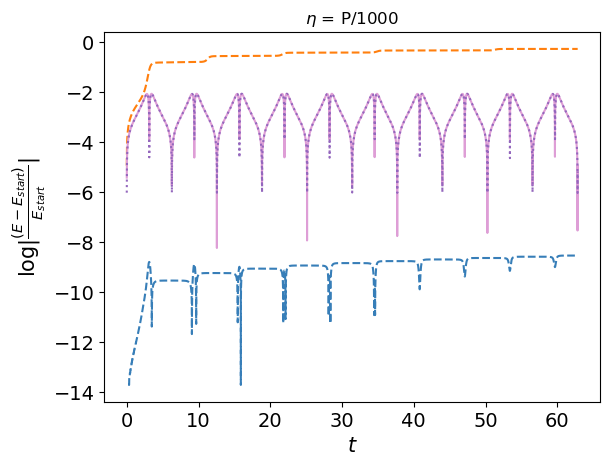

In [12]:
### log E
    #importing data 
    
    
    
    
    ## Energy

steps = [50,100,500,1000]
for i in steps:
    plt.close()
  
    #importing data 
    RK4=pd.read_csv("2bodyRK4_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER
    Euler=pd.read_csv("2bodyEuler_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER Cromer
    EC=pd.read_csv("2bodyEulerCromer_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#Leapfrog
    LF=pd.read_csv("2bodyLeapfrog_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)
    
    
    plt.plot(RK4.t, np.log10(np.abs(((RK4.E - RK4.E[0])/RK4.E[0]))),  label='RK4', ms = 1,linestyle = 'dashed', color = cmap2(1), zorder = 2)
    
    #Euler
    plt.plot(Euler.t, np.log10(np.abs(((Euler.E - Euler.E[0])/Euler.E[0]))),label='Euler',linestyle = 'dashed', color = cmap6(1),zorder =0)
    
    #Euler Cromer
    plt.plot(EC.t, np.log10(np.abs(((EC.E - EC.E[0])/EC.E[0]))), label='Euler-Cromer', color = cmap4(19), zorder = 1)
    
    #Leap.frog
    plt.plot(LF.t, np.log10(np.abs(((LF.E - LF.E[0])/LF.E[0]))), label='Verlet', linestyle = 'dotted', color = cmap6(4),zorder =2)
    
    
    # plot design
    plt.xlabel(r'$t$',fontsize = 15)
    plt.ylabel(r'$\log |{\frac{(E − E_{start})}{E_{start}}}|$', fontsize = 15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('$\eta$ = P/'+ str(i), fontsize = 12)
    
    if i == 50:
        plt.legend(fancybox= True, framealpha=0.5, fontsize= 13, bbox_to_anchor=(1.0, 0.4))
    

    plt.savefig("twobody_logE" + str(i) + ".pdf", bbox_inches = 'tight')
    #plt.savefig("nonadaptive_orbits" + str(i) + ".pdf")


#print(np.log10(np.abs(((LF.E - LF.E[0])/LF.E[0]))))



/Users/martapiscitelli/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/martapiscitelli/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/martapiscitelli/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/martapiscitelli/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


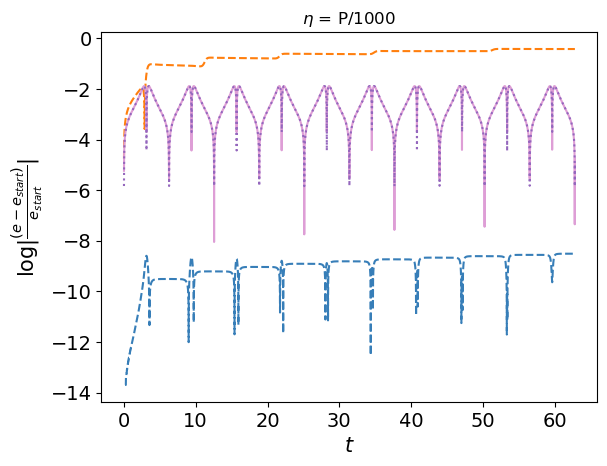

In [13]:
### log e
    #importing data 

steps = [50,100,500,1000]

for i in steps:
    plt.close()
 
    #importing data 
    RK4=pd.read_csv("2bodyRK4_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER
    Euler=pd.read_csv("2bodyEuler_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER Cromer
    EC=pd.read_csv("2bodyEulerCromer_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#Leapfrog
    LF=pd.read_csv("2bodyLeapfrog_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)
    
    
    plt.plot(RK4.t, np.log10(np.abs(((RK4.e - RK4.e[0])/(RK4.e[0])))), label='RK4', ms = 1,linestyle = 'dashed', color = cmap2(1), zorder = 2)
    
    #Euler
    plt.plot(Euler.t, np.log10(np.abs(((Euler.e - Euler.e[0])/(Euler.e[0])))),ms=1 ,label='Euler',linestyle = 'dashed', color = cmap6(1),zorder =0)
    
    #Euler Cromer
    plt.plot(EC.t, np.log10(np.abs(((EC.e - EC.e[0])/(EC.e[0])))),ms = 1, label='Euler-Cromer', color = cmap4(19), zorder = 1)
    
    #Leap.frog
    plt.plot(LF.t, np.log10(np.abs(((LF.e - LF.e[0])/(LF.e[0])))),ms = 0.1, label='Verlet', linestyle = 'dotted', color = cmap6(4),zorder =2)
    
    
    # plot design
    plt.xlabel(r'$t$',fontsize = 15)
    plt.ylabel(r'$\log |{\frac{(e − e_{start})}{e_{start}}}|$', fontsize = 15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('$\eta$ = P/'+ str(i), fontsize = 12)
    
    if i == 50:
        plt.legend(fancybox= True, framealpha=0.5, fontsize= 13, bbox_to_anchor=(1.0, 0.4))
    

    plt.savefig("twobody_logecc" + str(i) + ".pdf", bbox_inches = 'tight')
    #plt.savefig("nonadaptive_orbits" + str(i) + ".pdf")








#log |(E − Estart)/Estart|, log |(e −
#estart)/estart| and log |(a−a start)/a start|,

/Users/martapiscitelli/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/martapiscitelli/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/martapiscitelli/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/martapiscitelli/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


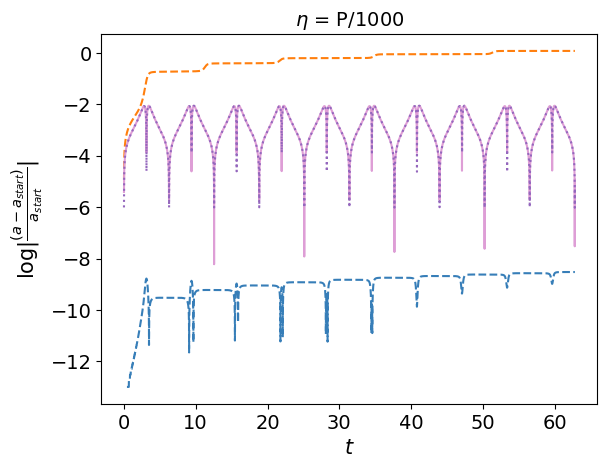

In [14]:
###  log |(a−a start)/a start|
    


steps = [50,100,500,1000]

for i in steps:
    plt.close()
  
    #importing data 
    RK4=pd.read_csv("2bodyRK4_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER
    Euler=pd.read_csv("2bodyEuler_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#EULER Cromer
    EC=pd.read_csv("2bodyEulerCromer_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)

#Leapfrog
    LF=pd.read_csv("2bodyLeapfrog_" + str(i) + "_steps_per_Orbit.txt",
    names = ["t", "p1","x1", "y1", "z1","vx1","vy1","vz1", "p2", "x2","y2" ,"z2", "vx2","vy2","vz2","e","E","a","j", "h"],
    encoding='latin-1',
    sep=" "
)
    
    
    plt.plot(RK4.t, np.log10(np.abs(((RK4.a - RK4.a[0])/(RK4.a[0])))),  label='RK4', ms = 1,linestyle = 'dashed', color = cmap2(1), zorder = 2)
    
    #Euler
    plt.plot(Euler.t, np.log10(np.abs(((Euler.a - Euler.a[0])/(Euler.a[0])))), label='Euler',linestyle = 'dashed', color = cmap6(1),zorder =0)
    
    #Euler Cromer
    plt.plot(EC.t, np.log10(np.abs(((EC.a - EC.a[0])/(EC.a[0])))), label='Euler-Cromer', color = cmap4(19), zorder = 1)
    
    #Leap.frog
    plt.plot(LF.t, np.log10(np.abs(((LF.a - LF.a[0])/(LF.a[0])))), label='Verlet', linestyle = 'dotted', color = cmap6(4),zorder =2)
    
    
    # plot design
    plt.xlabel(r'$t$',fontsize = 15)
    plt.ylabel(r'$\log |{\frac{(a − a_{start})}{a_{start}}}|$', fontsize = 15)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.title('$\eta$ = P/'+ str(i), fontsize = 14)
    
    if i == 50:
         plt.legend(fancybox= True, framealpha=0.5, fontsize= 13, bbox_to_anchor=(1.0, 0.4))
    
    

    plt.savefig("twobody_loga" + str(i) + ".pdf", bbox_inches = 'tight')


